# Data Cleaning and Prep

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/alexdlilly/DS6050_Project/main/predicted%20data.csv'
data = pd.read_csv(url)

,Unnamed: 0,index,filename,covid,score,uuid,datetime,cough_detected,SNR,latitude,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,0,0,001d8e33-a4af-4edb-98ba-b03f891d9a6c,1,0.986853,001d8e33-a4af-4edb-98ba-b03f891d9a6c,2020-05-13T01:27:42.552773+00:00,0.0306,12.713480,13.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00357712-dd5a-4c0a-90a4-39f1f4b9d5fd,1,0.005177,00357712-dd5a-4c0a-90a4-39f1f4b9d5fd,2020-04-10T12:48:17.554497+00:00,0.0576,0.000000,46.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,00e0a33c-6561-406e-b543-4c9f07b860f7,1,-0.124921,00e0a33c-6561-406e-b543-4c9f07b860f7,2020-04-15T07:01:51.945775+00:00,0.2798,12.695962,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,01424527-9c3b-4b6e-96f1-9eea3150819b,1,-0.022270,01424527-9c3b-4b6e-96f1-9eea3150819b,2020-10-18T15:51:28.858079+00:00,0.0000,16.047069,48.9,...,no_cough,NaN,False,False,False,False,False,False,NaN,NaN
4,4,4,015576c8-2b03-4dcb-b251-78a984fe86fe,1,-0.116273,015576c8-2b03-4dcb-b251-78a984fe86fe,2020-06-22T00:21:42.091345+00:00,1.0000,12.265701,NaN,...,good,unknown,False,False,False,False,False,True,obstructive_disease,mild


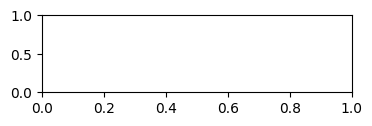

In [20]:
data.head()

In [6]:
data.columns

Index(['Unnamed: 0', 'index', 'filename', 'covid', 'score', 'uuid', 'datetime',
       'cough_detected', 'SNR', 'latitude', 'longitude', 'age', 'gender',
       'respiratory_condition', 'fever_muscle_pain', 'status', 'quality_1',
       'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1', 'choking_1',
       'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1', 'quality_2',
       'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2', 'choking_2',
       'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2', 'quality_3',
       'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3', 'choking_3',
       'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3', 'quality_4',
       'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4', 'choking_4',
       'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

In [18]:
cleaned = data.drop(['Unnamed: 0', 'index', 'filename', 'covid', 'uuid', 'datetime'], axis = 1)
## drop the columns that will not be used in prediction
## dropping covid column -- keeping status column and score column

In [21]:
cleaned.head()

,score,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,0.986853,0.0306,12.713480,13.8,-89.6,NaN,female,False,True,COVID-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.005177,0.0576,0.000000,46.8,6.6,NaN,male,True,False,COVID-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.124921,0.2798,12.695962,NaN,NaN,NaN,other,False,False,COVID-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.022270,0.0000,16.047069,48.9,2.5,39.0,female,False,False,COVID-19,...,no_cough,NaN,False,False,False,False,False,False,NaN,NaN
4,-0.116273,1.0000,12.265701,NaN,NaN,27.0,male,False,False,COVID-19,...,good,unknown,False,False,False,False,False,True,obstructive_disease,mild


In [14]:
cleaned.status.unique()

array(['COVID-19', 'healthy'], dtype=object)

In [56]:
cleaned = cleaned.fillna(method = 'bfill')

Remove nans with backfill

In [57]:
cleaned.head()

,score,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,0.986853,0.0306,12.713480,13.8,-89.6,39.0,female,False,True,COVID-19,...,no_cough,unknown,False,False,False,False,False,False,obstructive_disease,mild
1,0.005177,0.0576,0.000000,46.8,6.6,39.0,male,True,False,COVID-19,...,no_cough,unknown,False,False,False,False,False,False,obstructive_disease,mild
2,-0.124921,0.2798,12.695962,46.8,6.6,39.0,other,False,False,COVID-19,...,no_cough,unknown,False,False,False,False,False,False,obstructive_disease,mild
3,-0.022270,0.0000,16.047069,48.9,2.5,39.0,female,False,False,COVID-19,...,no_cough,unknown,False,False,False,False,False,False,obstructive_disease,mild
4,-0.116273,1.0000,12.265701,48.9,2.5,27.0,male,False,False,COVID-19,...,good,unknown,False,False,False,False,False,True,obstructive_disease,mild


In [58]:
cleaneddummied = pd.get_dummies(cleaned)

In [59]:
cleaneddummied.columns

Index(['score', 'cough_detected', 'SNR', 'latitude', 'longitude', 'age',
       'respiratory_condition', 'fever_muscle_pain', 'dyspnea_1', 'wheezing_1',
       ...
       'cough_type_4_wet', 'diagnosis_4_COVID-19', 'diagnosis_4_healthy_cough',
       'diagnosis_4_lower_infection', 'diagnosis_4_obstructive_disease',
       'diagnosis_4_upper_infection', 'severity_4_mild',
       'severity_4_pseudocough', 'severity_4_severe', 'severity_4_unknown'],
      dtype='object', length=101)

In [60]:
cleaneddummied.head()

,score,cough_detected,SNR,latitude,longitude,age,respiratory_condition,fever_muscle_pain,dyspnea_1,wheezing_1,...,cough_type_4_wet,diagnosis_4_COVID-19,diagnosis_4_healthy_cough,diagnosis_4_lower_infection,diagnosis_4_obstructive_disease,diagnosis_4_upper_infection,severity_4_mild,severity_4_pseudocough,severity_4_severe,severity_4_unknown
0,0.986853,0.0306,12.713480,13.8,-89.6,39.0,False,True,False,False,...,0,0,0,0,1,0,1,0,0,0
1,0.005177,0.0576,0.000000,46.8,6.6,39.0,True,False,False,False,...,0,0,0,0,1,0,1,0,0,0
2,-0.124921,0.2798,12.695962,46.8,6.6,39.0,False,False,False,False,...,0,0,0,0,1,0,1,0,0,0
3,-0.022270,0.0000,16.047069,48.9,2.5,39.0,False,False,False,False,...,0,0,0,0,1,0,1,0,0,0
4,-0.116273,1.0000,12.265701,48.9,2.5,27.0,False,False,False,False,...,0,0,0,0,1,0,1,0,0,0


In [61]:
cleaneddummied.rename(columns = {'status_COVID-19':'statusCOVID19'}, inplace=True)

In [62]:
cleaneddummied.columns.tolist()

['score',
 'cough_detected',
 'SNR',
 'latitude',
 'longitude',
 'age',
 'respiratory_condition',
 'fever_muscle_pain',
 'dyspnea_1',
 'wheezing_1',
 'stridor_1',
 'choking_1',
 'congestion_1',
 'nothing_1',
 'dyspnea_2',
 'wheezing_2',
 'stridor_2',
 'choking_2',
 'congestion_2',
 'nothing_2',
 'dyspnea_3',
 'wheezing_3',
 'stridor_3',
 'choking_3',
 'congestion_3',
 'nothing_3',
 'dyspnea_4',
 'wheezing_4',
 'stridor_4',
 'choking_4',
 'congestion_4',
 'nothing_4',
 'gender_female',
 'gender_male',
 'gender_other',
 'statusCOVID19',
 'status_healthy',
 'quality_1_good',
 'quality_1_no_cough',
 'quality_1_ok',
 'quality_1_poor',
 'cough_type_1_dry',
 'cough_type_1_unknown',
 'cough_type_1_wet',
 'diagnosis_1_COVID-19',
 'diagnosis_1_healthy_cough',
 'diagnosis_1_lower_infection',
 'diagnosis_1_obstructive_disease',
 'diagnosis_1_upper_infection',
 'severity_1_mild',
 'severity_1_pseudocough',
 'severity_1_severe',
 'severity_1_unknown',
 'quality_2_good',
 'quality_2_no_cough',
 'qual

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
y = cleaneddummied.statusCOVID19

In [97]:
x = cleaneddummied.drop(['statusCOVID19', 'status_healthy'], axis=1)

In [99]:
np.all(np.isfinite(x))

False

In [100]:
np.isinf(x).values.sum()

5

In [101]:
x.columns.to_series()[np.isinf(x).any()]

SNR    SNR
dtype: object

In [102]:
x.index[np.isinf(x).any(1)]

<ipython-input-102-802ed826081d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  x.index[np.isinf(x).any(1)]


Int64Index([5447, 6252, 7972, 9124, 11716], dtype='int64')

Set all infinity values to the max real value

In [103]:
x.SNR.quantile(q=.999)

83.53848954151096

In [104]:
x.SNR[5447] = 100

<ipython-input-104-a445dcbe8687>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.SNR[5447] = 100


In [105]:
x.SNR[6252] = 100

<ipython-input-105-3feaa275459f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.SNR[6252] = 100


In [106]:
x.SNR[7972] = 100

<ipython-input-106-74ae63d39e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.SNR[7972] = 100


In [107]:
x.SNR[9124] = 100

<ipython-input-107-c282f88d362b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.SNR[9124] = 100


In [108]:
x.SNR[11716] = 100

<ipython-input-108-58ba2f9a1fa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.SNR[11716] = 100


In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=777
)

In [199]:
model = LogisticRegression(solver='liblinear', random_state=777)

In [200]:
model.fit(X_train,y_train)

LogisticRegression(random_state=777, solver='liblinear')

In [201]:
model.score(X_test,y_test)

0.9281663516068053

In [202]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9281663516068053
F1 Score: 0.9442644750680637


In [203]:
confusion_matrix(y_test, model.predict(X_test))

array([[3835,   35],
       [ 269,   93]])

In [204]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3870
           1       0.73      0.26      0.38       362

    accuracy                           0.93      4232
   macro avg       0.83      0.62      0.67      4232
weighted avg       0.92      0.93      0.91      4232



Increasing regularization

In [205]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=777)
model.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=777, solver='liblinear')

In [206]:
model.score(X_test,y_test)

0.9276937618147448

In [207]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9276937618147448
F1 Score: 0.9428734959491625


In [208]:
confusion_matrix(y_test, model.predict(X_test))

array([[3829,   41],
       [ 265,   97]])

In [209]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3870
           1       0.70      0.27      0.39       362

    accuracy                           0.93      4232
   macro avg       0.82      0.63      0.67      4232
weighted avg       0.92      0.93      0.91      4232



## Naive Bayes Classification

In [212]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [213]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.8383742911153119
F1 Score: 0.8179572330058235


In [214]:
confusion_matrix(y_test, model.predict(X_test))

array([[3378,  492],
       [ 192,  170]])

## LDA

In [157]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [215]:
model = LinearDiscriminantAnalysis(shrinkage=None)
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [216]:
model.score(X_test,y_test)

0.917296786389414

In [217]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.917296786389414
F1 Score: 0.9283688895418295


In [218]:
confusion_matrix(y_test, model.predict(X_test))

array([[3776,   94],
       [ 256,  106]])

## QDA

In [182]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [219]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [220]:
model.score(X_test,y_test)

0.6205103969754253

In [221]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6205103969754253
F1 Score: 0.5375578341948563


In [222]:
confusion_matrix(y_test, model.predict(X_test))

array([[2351, 1519],
       [  87,  275]])